In [70]:
import pandas as pd

In [71]:
df = pd.read_csv('train/TRAIN_A.csv')

- timestamp: 분 단위 시점
- Q: 유량
- M: 펌프가동정보 (On=1, Off=0)
- P: 압력
- anomaly: 해당 시점에서의 정상(0), 이상(1) 여부
- P_flag: 해당 시점에서의 압력계의 정상(0), 이상(1) 여부

In [72]:
df

,timestamp,Q1,Q2,Q3,Q4,Q5,M1,M2,M3,M4,...,P17_flag,P18_flag,P19_flag,P20_flag,P21_flag,P22_flag,P23_flag,P24_flag,P25_flag,P26_flag
0,24/05/27 00:00,17880,37151.001,24834.001,6321,85828,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,24/05/27 00:01,17970,37069.001,25016.001,6367,85212,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,24/05/27 00:02,17280,37345.000,24462.000,6431,85655,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,24/05/27 00:03,17280,37345.000,24462.000,6431,85619,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,24/05/27 00:04,17920,37075.000,24896.001,6206,85619,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44096,24/06/26 14:56,17610,32767.000,41071.001,6364,97783,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
44097,24/06/26 14:57,17490,32866.001,40488.000,6469,96785,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
44098,24/06/26 14:58,17490,32866.001,40488.000,6469,97707,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
44099,24/06/26 14:59,18300,32646.001,41702.002,6616,97707,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
print(df.isnull().sum().value_counts())

0    73
Name: count, dtype: int64


In [74]:
df['anomaly'].value_counts()

anomaly
0    44071
1       30
Name: count, dtype: int64

In [75]:
df.columns

Index(['timestamp', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'M1', 'M2', 'M3', 'M4', 'M5',
       'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',
       'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23',
       'P24', 'P25', 'P26', 'anomaly', 'P1_flag', 'P2_flag', 'P3_flag',
       'P4_flag', 'P5_flag', 'P6_flag', 'P7_flag', 'P8_flag', 'P9_flag',
       'P10_flag', 'P11_flag', 'P12_flag', 'P13_flag', 'P14_flag', 'P15_flag',
       'P16_flag', 'P17_flag', 'P18_flag', 'P19_flag', 'P20_flag', 'P21_flag',
       'P22_flag', 'P23_flag', 'P24_flag', 'P25_flag', 'P26_flag'],
      dtype='object')

In [76]:
df.describe()['Q1']

count    44101.000000
mean     21642.090882
std       7437.921740
min      15080.000000
25%      17250.000000
50%      17620.000000
75%      18340.000000
max      37690.000000
Name: Q1, dtype: float64

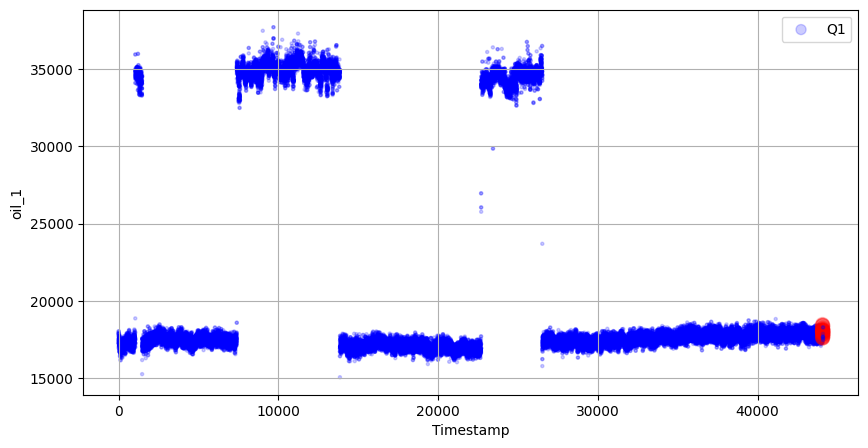

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

colors = ['red' if val == 1 else 'blue' for val in df['anomaly']]
ss = [100 if val == 1 else 5 for val in df['anomaly']]
plt.scatter(df.index, df['Q1'], color=colors, s=ss, label = 'Q1', alpha=0.2)

plt.xlabel('Timestamp')
plt.ylabel('oil_1')
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

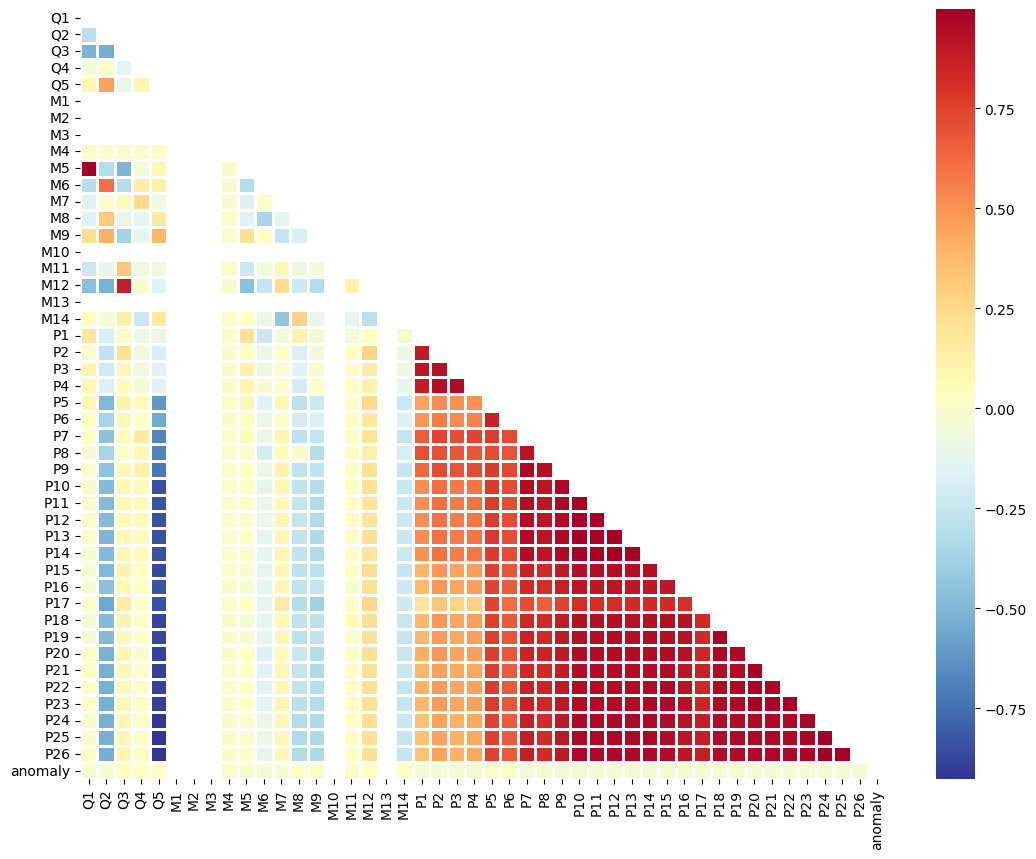

In [78]:
import numpy as np
import seaborn as sns
df_corr = df.iloc[:,:47].copy()
corr = df_corr.corr(numeric_only=True)
mask = np.ones_like(corr, dtype=bool)
mask = np.triu(mask)
plt.figure(figsize=(13,10))

# 상관관계 히트맵 생성
sns.heatmap(data = corr, annot=False, fmt='.2f', mask=mask, linewidths=1, cmap='RdYlBu_r')

In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 정규화
standard_scaler = StandardScaler()
df['std_Q1'] = standard_scaler.fit_transform(df[['Q1']])
df.loc[:,['Q1','std_Q1']].head()

,Q1,std_Q1
0,17880,-0.505804
1,17970,-0.493704
2,17280,-0.586473
3,17280,-0.586473
4,17920,-0.500426


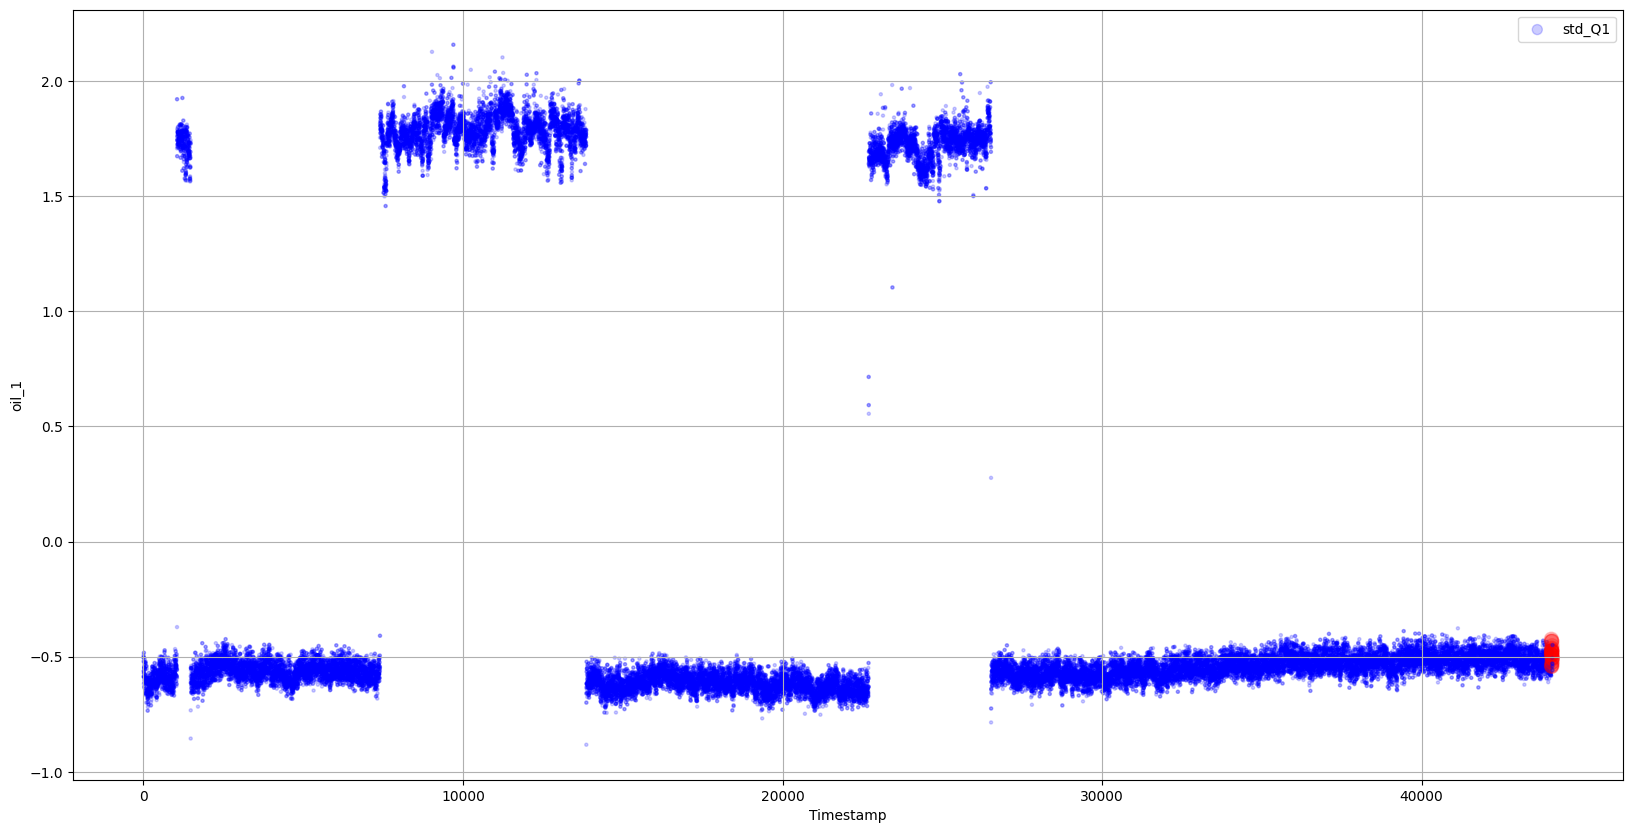

In [80]:
plt.figure(figsize=(20,10))

colors = ['red' if val == 1 else 'blue' for val in df['anomaly']]
ss = [100 if val == 1 else 5 for val in df['anomaly']]
plt.scatter(df.index, df['std_Q1'], color=colors, s=ss, label = 'std_Q1', alpha=0.2)

plt.xlabel('Timestamp')
plt.ylabel('oil_1')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
df.head(1)

,timestamp,Q1,Q2,Q3,Q4,Q5,M1,M2,M3,M4,...,P18_flag,P19_flag,P20_flag,P21_flag,P22_flag,P23_flag,P24_flag,P25_flag,P26_flag,std_Q1
0,24/05/27 00:00,17880,37151.001,24834.001,6321,85828,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-0.505804


In [82]:
df['date'] = df['timestamp'].str.split(' ').str[0]

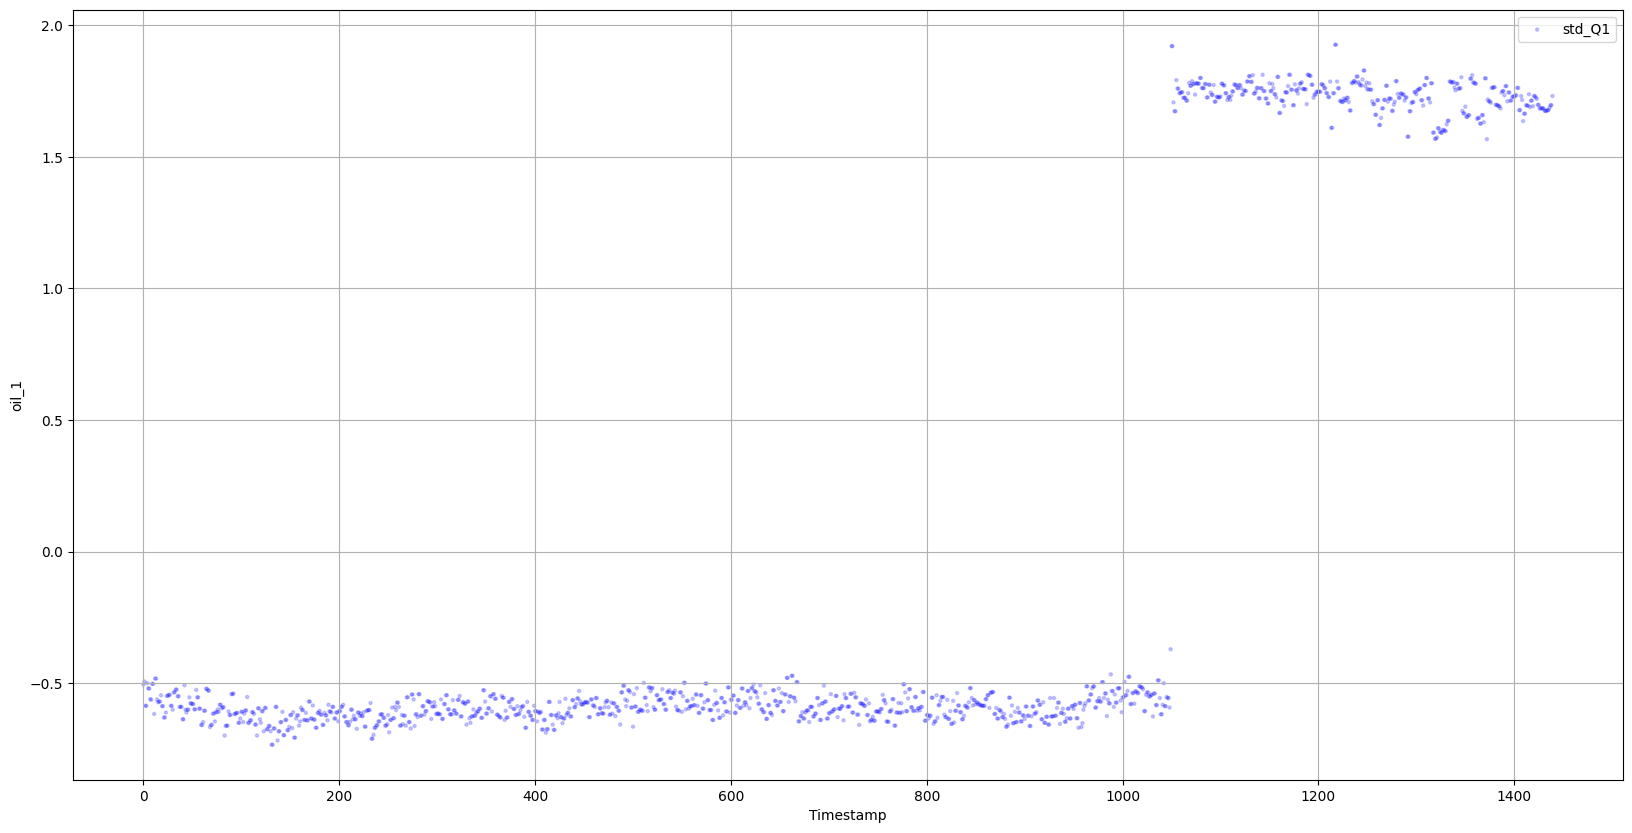

In [83]:
plt.figure(figsize=(20,10))
df_0527 = df[df['date'] == '24/05/27'].copy()
colors = ['red' if val == 1 else 'blue' for val in df_0527['anomaly']]
ss = [100 if val == 1 else 5 for val in df_0527['anomaly']]
plt.scatter(df_0527.index, df_0527['std_Q1'], color=colors, s=ss, label = 'std_Q1', alpha=0.2)

plt.xlabel('Timestamp')
plt.ylabel('oil_1')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
tmp = list(df['date'].unique())
print(tmp)
print(len(tmp))

['24/05/27', '24/05/28', '24/05/29', '24/05/30', '24/05/31', '24/06/01', '24/06/02', '24/06/03', '24/06/04', '24/06/05', '24/06/06', '24/06/07', '24/06/08', '24/06/09', '24/06/10', '24/06/11', '24/06/12', '24/06/13', '24/06/14', '24/06/15', '24/06/16', '24/06/17', '24/06/18', '24/06/19', '24/06/20', '24/06/21', '24/06/22', '24/06/23', '24/06/24', '24/06/25', '24/06/26']
31


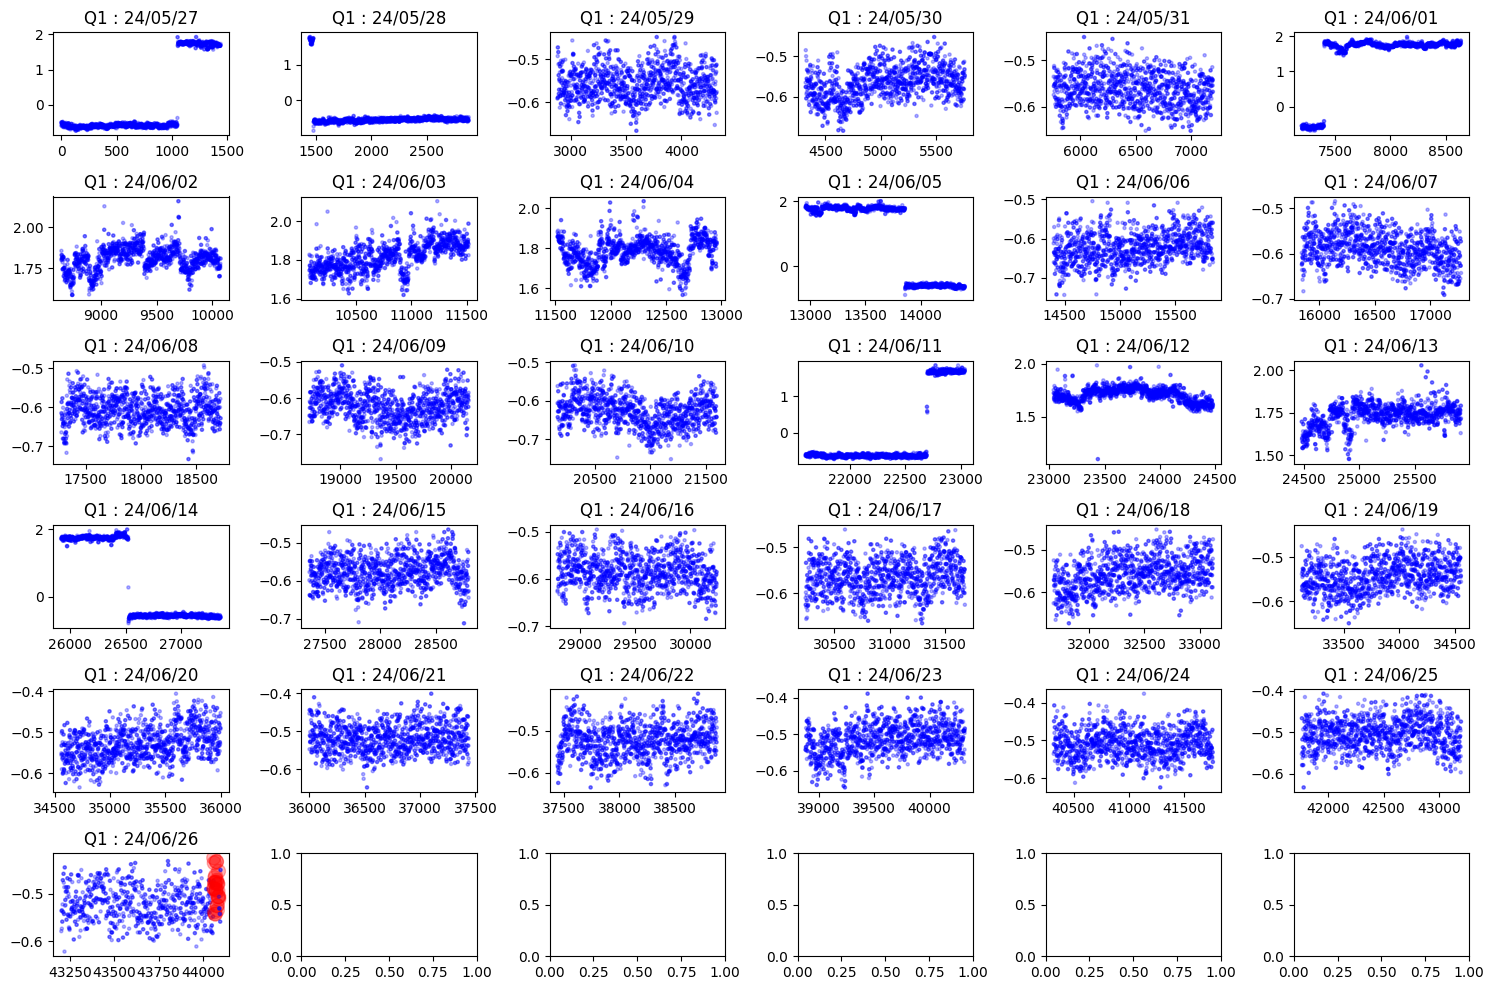

In [85]:
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(15, 10))

for i in range(len(tmp)):
    row = i // 6  # 7개의 열을 기준으로 행 번호 계산
    col = i % 6  # 열 번호 계산
    df_tmp = df[df['date'] == tmp[i]].copy()
    colors = ['red' if val == 1 else 'blue' for val in df_tmp['anomaly']]
    ss = [100 if val == 1 else 5 for val in df_tmp['anomaly']]
    ax[row, col].scatter(df_tmp.index, df_tmp['std_Q1'], color=colors, s=ss, alpha = 0.3)
    ax[row, col].set_title(f'Q1 : {tmp[i]}')
    #plt.scatter(df_0527.index, df_0527['std_Q1'], color=colors, s=ss, label = 'std_Q1', alpha=0.2)

plt.tight_layout()
plt.show()

# 정규화


In [86]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 정규화
def Standardization(df, col_name):
    standard_scaler = StandardScaler()
    df[f'std_{col_name}'] = standard_scaler.fit_transform(df[[col_name]])

# 시각화


In [87]:
def Visualize_Column(df, nrow, ncol, div_col_name:str, target_col_name:str, figs_x = 15, figs_y = 10, endpoint = False):
    tmp = list(df[f'{div_col_name}'].unique())
    if endpoint:
        df_tmp = df[df[div_col_name] == tmp[-1]].copy()
        colors = ['red' if val == 1 else 'blue' for val in df_tmp['anomaly']]
        ss = [100 if val == 1 else 5 for val in df_tmp['anomaly']]
        plt.scatter(df_tmp.index, df_tmp[target_col_name], color=colors, s=ss, alpha = 0.3)
        plt.title(f'{target_col_name} : {tmp[-1]}')
        plt.show()
        return
    
    fig, ax = plt.subplots(nrows = nrow, ncols = ncol, figsize=(figs_x, figs_y))
    for i in range(len(tmp)):
        row = i // nrow  # 7개의 열을 기준으로 행 번호 계산
        col = i % ncol  # 열 번호 계산
        df_tmp = df[df[div_col_name] == tmp[i]].copy()
        colors = ['red' if val == 1 else 'blue' for val in df_tmp['anomaly']]
        ss = [100 if val == 1 else 5 for val in df_tmp['anomaly']]
        ax[row, col].scatter(df_tmp.index, df_tmp[target_col_name], color=colors, s=ss, alpha = 0.3)
        ax[row, col].set_title(f'{target_col_name} : {tmp[i]}')

    plt.tight_layout()
    plt.show()

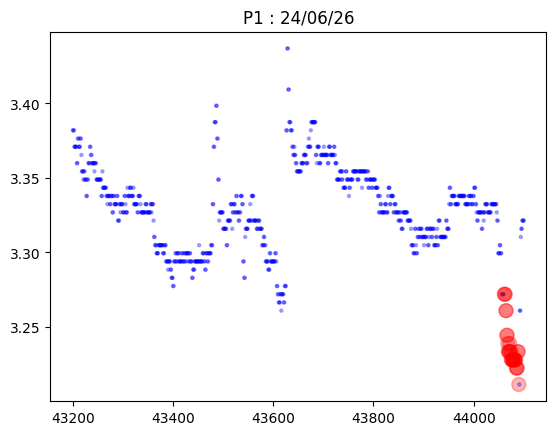

In [88]:
Visualize_Column(df, 6,6,'date','P1', endpoint=True)

## P값과 P_flag의 값으로 새로운 변수 P_value


In [89]:
import re
# 정규표현식을 사용해 자동으로 column 이름 매핑
for col in df.columns:
    match = re.match(r'^(P\d+)_flag$', col)  # flag 컬럼 찾기
    if match:
        prefix = match.group(1)  # P1, P2, P3 중 하나 추출
        df[f'{prefix}_value'] = df[prefix] * abs(df[col]-1)  # 곱한 값을 새로운 컬럼에 추가

df.columns

Index(['timestamp', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'M1', 'M2', 'M3', 'M4',
       ...
       'P17_value', 'P18_value', 'P19_value', 'P20_value', 'P21_value',
       'P22_value', 'P23_value', 'P24_value', 'P25_value', 'P26_value'],
      dtype='object', length=101)

In [90]:
print(list(df.columns))

['timestamp', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'anomaly', 'P1_flag', 'P2_flag', 'P3_flag', 'P4_flag', 'P5_flag', 'P6_flag', 'P7_flag', 'P8_flag', 'P9_flag', 'P10_flag', 'P11_flag', 'P12_flag', 'P13_flag', 'P14_flag', 'P15_flag', 'P16_flag', 'P17_flag', 'P18_flag', 'P19_flag', 'P20_flag', 'P21_flag', 'P22_flag', 'P23_flag', 'P24_flag', 'P25_flag', 'P26_flag', 'std_Q1', 'date', 'P1_value', 'P2_value', 'P3_value', 'P4_value', 'P5_value', 'P6_value', 'P7_value', 'P8_value', 'P9_value', 'P10_value', 'P11_value', 'P12_value', 'P13_value', 'P14_value', 'P15_value', 'P16_value', 'P17_value', 'P18_value', 'P19_value', 'P20_value', 'P21_value', 'P22_value', 'P23_value', 'P24_value', 'P25_value', 'P26_value']


In [91]:
df.iloc[:2,75:]

,P1_value,P2_value,P3_value,P4_value,P5_value,P6_value,P7_value,P8_value,P9_value,P10_value,...,P17_value,P18_value,P19_value,P20_value,P21_value,P22_value,P23_value,P24_value,P25_value,P26_value
0,3.206,3.1621,0.7022,0.6956,1.0556,1.0425,3.9288,0.1163,0.1659,5.6972,...,3.5763,2.51,2.47,3.005,3.0,2.98,2.9875,2.8981,2.8175,2.7762
1,3.206,3.1566,0.7125,0.7041,1.0688,1.0584,3.9237,0.1144,0.1678,5.7028,...,3.5763,2.51,2.47,3.005,3.0,2.98,2.9875,2.8994,2.8163,2.7750


In [92]:
X = df.iloc[:,75:]
y = df['anomaly']

In [93]:
X.to_csv('./X_data.csv')
y.to_csv('./y_data.csv')

In [94]:
for i in range(1,27):
    num = str(i)
    print(X['P' + num + '_value'].value_counts())

P1_value
3.2885    2366
3.2775    2313
3.2830    2308
3.2940    2246
3.2720    2121
          ... 
3.4973       2
3.5137       2
3.4918       2
3.5192       1
3.5082       1
Name: count, Length: 71, dtype: int64
P2_value
3.1676    4988
3.2060    4231
3.2390    3246
3.1621    3213
3.2445    2640
          ... 
3.3764       2
3.4313       2
3.0742       2
3.0797       1
3.4478       1
Name: count, Length: 67, dtype: int64
P3_value
0.7659    740
0.7688    699
0.7641    691
0.7678    683
0.7706    647
         ... 
0.6922      1
0.7588      1
0.7686      1
0.9769      1
0.6347      1
Name: count, Length: 336, dtype: int64
P4_value
0.7669    647
0.7659    622
0.7622    610
0.7575    607
0.7594    606
         ... 
0.6122      1
0.6864      1
0.6488      1
0.6347      1
0.6366      1
Name: count, Length: 339, dtype: int64
P5_value
1.0697    600
0.9984    580
1.0688    579
1.0716    570
0.9909    557
         ... 
0.9661      1
1.0071      1
1.0117      1
0.9991      1
1.1597      1
Name: cou

In [95]:
X.describe()

,P1_value,P2_value,P3_value,P4_value,P5_value,P6_value,P7_value,P8_value,P9_value,P10_value,...,P17_value,P18_value,P19_value,P20_value,P21_value,P22_value,P23_value,P24_value,P25_value,P26_value
count,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,...,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000
mean,3.299315,3.211265,0.770069,0.753334,1.036325,1.036782,3.901061,0.130433,0.135978,5.605255,...,3.379153,2.320475,2.305669,2.823816,2.879957,2.885323,2.893190,2.685291,2.601296,2.558205
std,0.049205,0.048810,0.047698,0.048550,0.046270,0.053054,0.071049,0.069671,0.071944,0.097244,...,0.123483,0.137757,0.142478,0.139589,0.141168,0.145070,0.145875,0.171151,0.171603,0.172575
min,3.063200,2.986300,0.542800,0.542800,0.905600,0.878400,3.736200,0.000000,0.000000,5.381200,...,3.052500,1.961200,1.936200,2.460000,2.520000,2.516200,2.523800,2.301200,2.216200,2.165000
25%,3.266500,3.167600,0.736900,0.719100,0.997500,0.998400,3.848800,0.077800,0.078700,5.537800,...,3.291200,2.218800,2.198800,2.721300,2.777500,2.781200,2.786300,2.562500,2.472500,2.428800
50%,3.294000,3.206000,0.766900,0.754700,1.034100,1.039700,3.893700,0.119100,0.130300,5.595000,...,3.377500,2.302500,2.290000,2.801200,2.858800,2.865000,2.873700,2.659400,2.574400,2.534400
75%,3.326900,3.244500,0.796900,0.779100,1.069700,1.067800,3.947500,0.169700,0.179100,5.669100,...,3.468800,2.410000,2.397500,2.903700,2.967500,2.972500,2.986200,2.783100,2.702500,2.656200
max,3.519200,3.447800,0.986200,0.975000,1.208400,1.246900,4.185000,0.448100,0.449100,6.011300,...,3.825000,3.041200,3.003800,3.542500,3.587500,3.570000,3.575000,3.426200,3.338700,3.301900


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# # 1. 데이터 준비 (샘플 시계열 데이터 생성)
# np.random.seed(42)  # 재현성을 위해 랜덤 시드 고정
# num_samples = 1000
# num_features = 26

# # feature 데이터와 레이블 생성
# X = np.random.rand(num_samples, num_features)  # 26개의 feature
# y = np.random.choice([0, 1], size=num_samples)  # 0 또는 1 레이블

# # 데이터프레임으로 변환 (열 이름 지정)
# columns = [f'feature_{i}' for i in range(1, num_features + 1)]
# df = pd.DataFrame(X, columns=columns)
# df['target'] = y

# 2. Train/Test Split
# X = df.drop('target', axis=1)
# y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Baseline Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8817
           1       0.00      0.00      0.00         4

    accuracy                           1.00      8821
   macro avg       0.50      0.50      0.50      8821
weighted avg       1.00      1.00      1.00      8821



c:\Users\ediso\anaconda3\envs\py3_11_9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ediso\anaconda3\envs\py3_11_9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ediso\anaconda3\envs\py3_11_9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [100]:
print(len(X_train),len(X_test))

35280 8821


In [101]:
# 3. 모델 학습 (Baseline: Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 4. 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 결과 출력
print(f'Baseline Model Accuracy: {accuracy:.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Baseline Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8817
           1       0.00      0.00      0.00         4

    accuracy                           1.00      8821
   macro avg       0.50      0.50      0.50      8821
weighted avg       1.00      1.00      1.00      8821



c:\Users\ediso\anaconda3\envs\py3_11_9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ediso\anaconda3\envs\py3_11_9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ediso\anaconda3\envs\py3_11_9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

### A 외에도 B,C,D 관찰


In [102]:
df_B = pd.read_csv('./train/TRAIN_B.csv')
df_B.columns

Index(['timestamp', 'Q1', 'Q2', 'Q3', 'Q4', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9', 'P10', 'anomaly', 'P1_flag', 'P2_flag', 'P3_flag',
       'P4_flag', 'P5_flag', 'P6_flag', 'P7_flag', 'P8_flag', 'P9_flag',
       'P10_flag'],
      dtype='object')

In [104]:
df_B.describe()

,Q1,Q2,Q3,Q4,P1,P2,P3,P4,P5,P6,...,P1_flag,P2_flag,P3_flag,P4_flag,P5_flag,P6_flag,P7_flag,P8_flag,P9_flag,P10_flag
count,41760.000000,41760.000000,41760.000000,41760.000000,41760.000000,41760.000000,41760.000000,41760.000000,41760.000000,41760.000000,...,41760.0,41760.0,41760.0,41760.0,41760.0,41760.0,41760.00000,41760.00000,41760.00000,41760.0
mean,27906.014278,6973.303858,12646.885704,7740.890513,5.080270,3.962206,3.915287,4.177363,4.334468,4.186904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00079,0.00079,0.00079,0.0
std,1401.784212,412.794848,1082.299593,837.534169,0.152008,0.198661,0.198303,0.207075,0.210726,0.212307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.02810,0.02810,0.02810,0.0
min,21779.845700,4641.205600,9238.000000,4979.551300,4.665000,3.402500,3.391200,3.665000,3.782500,3.581200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0
25%,27166.562500,6741.087275,11900.000000,7174.921900,4.965000,3.803800,3.792500,4.026900,4.185000,3.997500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0
50%,28055.779300,7036.631150,12673.000000,7850.737300,5.070000,3.908800,3.895000,4.161300,4.288800,4.186300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0
75%,28882.654300,7258.119275,13425.000000,8456.281750,5.190000,4.100000,4.006200,4.310000,4.482800,4.292500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0
max,31670.623000,8050.651400,15718.000000,9555.664100,5.690000,4.707500,4.695000,4.966200,5.186300,4.995000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,1.00000,1.00000,0.0


# 학습용 & 평가용 에 존재하는 Q, M, P의 관계성


In [1]:
import pandas as pd
import re

In [6]:
df = pd.read_csv('train/TRAIN_A.csv')

# filtered_columns = [col for col in df.columns if not (col == 'timestamp' or col == 'anomaly' or col.endswith('_flag'))]
# print(filtered_columns)

# 정규표현식으로 제외할 컬럼 패턴 정의
exclude_pattern = re.compile(r'(timestamp|anomaly|_flag$)')

# 제외된 컬럼 필터링
filtered_columns = [col for col in df.columns if not exclude_pattern.search(col)]

df_train = df[filtered_columns]

In [8]:
df_train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26'],
      dtype='object')

<Axes: >

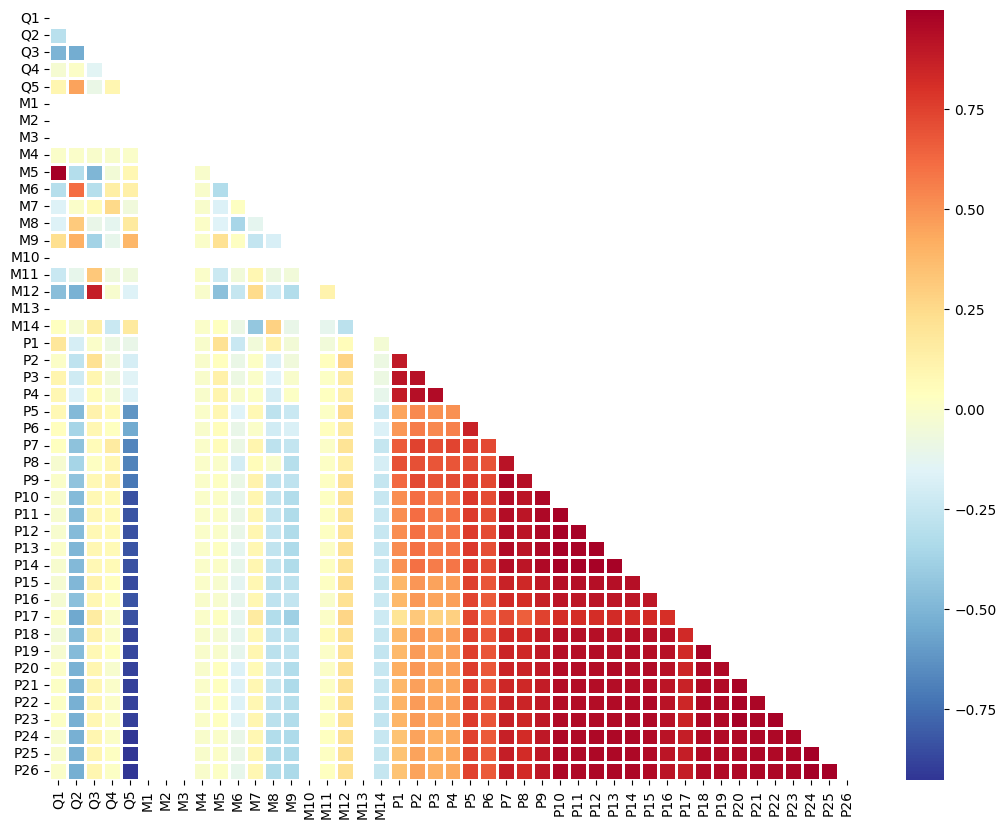

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

df_train_corr = df_train.copy()
corr = df_train_corr.corr(numeric_only=True)
mask = np.ones_like(corr, dtype=bool)
mask = np.triu(mask)
plt.figure(figsize=(13,10))

# 상관관계 히트맵 생성
sns.heatmap(data = corr, annot=False, fmt='.2f', mask=mask, linewidths=1, cmap='RdYlBu_r')